# 実物的景気循環（RBC）モデル

In [3]:
import japanize_matplotlib
import linearsolve as ls
import numpy as np
import pandas as pd

## 説明

```{margin}
<div name="html-admonition">
Do you want to read in a differnt language? Start
<input type="button" onclick="location.href='https://translate.google.com/translate?hl=&sl=ja&tl=en&u='+window.location;" value="Google" style="color:#ffffff;background-color:#008080;" onmouseover="this.style.background='#99ccff'" onmouseout="this.style.background='#008080'"/><input type="button" onclick="location.href='https://translate.google.com/translate?hl=&sl=ja&tl=en&u='+window.location;" value="translation" style="color:#ffffff;background-color:#008080;" onmouseover="this.style.background='#99ccff'" onmouseout="this.style.background='#008080'"/>
in English or the language of your choice.
</div>
```

実物的景気循環モデル（Real Business Cycles Model; RBCモデル）は動学的一般均衡モデルであり、今盛んに研究が行われているDSGEモデル（Dynamic Stochastic General Equilibrium Model）の先駆けとなるモデルである。次の３つがRBCモデルの要となる仮定である。
1. 全ての市場は完全競争である。
1. 毎期ごとに消費者は財の消費と労働供給量を内生的に決定する。
1. 全要素生産性（TFP）はAR(1)に従って、確率的に変動する。

最後の仮定により、GDPを含むマクロ変数の変動が発生する。AR(1)は定常状態に戻る傾向にあるので、TFPのショックは一時的なものとなるが、ホワイト・ノイズが含まれているため、TFPショックは毎期毎期発生することになる。直感的に説明するために、TFPが上昇したと考えると基本的には次の２つのメカニズムが働くことになる。
1. 労働の限界生産物は増加し実質賃金の上昇する。これにより以下が発生する。
    * 労働供給の増加
    * 生産量増加
    * 消費の増加
    * 貯蓄の変化
1. 資本の限界生産物は増加し実質利子率は上昇する。これにより以下が発生する。
    * 投資の増加
    * 資本ストックの増加
    * 生産量の増加
    * 貯蓄の変化

これらのメカニズムは別々に独立して動くのではなく，お互いに影響しあいマクロ変数に影響を与えることになる。もちろん，最初のショック発生後にショックが続かなければマクロ変数は定常状態に戻っていく。しかしTFPはAR(1)のプロセスに従ってショックが発生するため、ショックが発生する度に、上述のメカニズムが作動することになり、景気循環が発生することになる。

これがRBCモデルの基本的な経済学的なメカニズムとなるが，マクロデータをどの程度説明できるのだろうか。この問を検討するのがこの章の目的である。

## 基本RBCモデルの詳細

### 記号と基本的な仮定

ここでは最も簡単なRBCモデルを考えるために，労働供給は一定と仮定する。後に，内生的な労働供給を導入することにする。

記号：
* $Y_t$：産出量（基準財として価格は`1`）
* $A_t$：全要素生産性（TFP）
* $K_t$：資本ストック
* $L$：総労働時間（一定と仮定）
* $I_t$：投資
* $d$：資本減耗率
* $R_t$：実質利子率
* $W_t$：実質賃金

生産関数にはコブ・ダグラス型を仮定しよう。

$$
Y_t=A_tK_t^{\alpha}L^{1-\alpha}
$$ (eq:15-production)


ここでTFPについて次の式を置く。

$$
A_{t+1}=A_t^{\rho}e^{v_t},
\qquad
v_t\sim\mathcal{N}(0,\sigma^2)
$$

所得恒等式は

$$
Y_t=C_t+I_t
$$ (eq:15-identity)

であり、資本ストックは

$$
K_{t+1}=I_t+(1-d)K_t
$$ (eq:15-capital)

に従って変化する。これらの式は基本的に確率的ソロー・モデルと同じであり、異なる点は、投資$I_t$と等しい貯蓄は消費者の最適行動を通して決定される点であり、次にそれについて説明する。

### 効用関数

RBCモデルでは効用を最大化する消費者の行動が重要な役割を果たすことになる。$L$人の消費者が存在すると仮定するが、全ての消費者は同質（「クローン人間?」）と仮定する。これにより「代表的個人」と呼ばれる1人の消費者の行動だけを考えれば全ての消費者の行動を捉えることが可能となる。

１期間は四半期と考え、消費者が$t$期に得る効用は

$$
u_t=
\begin{cases}
&\dfrac{C_t^{1-\theta}-1}{1-\theta}\quad\text{for }\theta>0\text{ and }\theta\neq 1\\
&\log(C_t)\quad\text{for }\theta=1
\end{cases}
$$ (eq:15-utility)

で与えられるとしよう。ここで$C_t$は$t$期での消費である。この効用関数から次のことがいえる。消費が１単位増えると効用は増加するが、その変化は次の限界効用で表される。
    
$$\frac{du_t}{dC_t}=\frac{1}{C_t^\theta}$$

また消費が$N$単位増加する場合の効用の変化は$\dfrac{N}{C_t^\theta}$となる。

更に，消費者は無限期間生存すると仮定しよう。もちろん現実的ではないが，問題を簡単にするためである。初期時点（$t=0$）での消費者の生涯（無限期間）効用$U_0$を次式とおく。

$$
U_0=u_0+\beta u_1+\beta^2 u_2+\beta^3 u_3+\cdots
$$ (eq:15-lifetimeU)

ここで$0<\beta<1$（例えば、0.99）は主観的割引因子と呼ばれるものであり、将来の効用の重要性（ウェイト）を捉えている。注意する点は，$\beta^t>\beta^{t+1}$が必ず成立するため，消費者にとって将来の効用の重要性は減少するということである。将来も重要だが，将来よりも今の方が大事だという考えを捉えている。$\beta$の意味をもう少し説明するために$\beta=1$としてみよう。この場合、50年後や100年後の将来の効用は今の効用と等しく重要だという意味であり，そのような消費者は極端に我慢強いと言える。そういう意味で、高い$\beta$はより我慢強い選好を表している。

無限期間生きる消費者の効用最大化問題は非常に難しいと思うかもしれない。実際，数学的に緻密な計算をするのは高度な数学が求められる。しかし，ミクロ経済学で学んだ単純な消費者の効用最大化問題を理解することができれば，簡単に理解できるものとなっている。そのために，まず２財の効用最大化問題を復習してみよう。

### 復習：２財の効用最大化問題

消費者は２財$x_0$と$x_1$を消費し，効用関数は$u(x_0,x_1)$と仮定する（例えば，対数効用関数であれば$\log(x_0)+\log(x_1)$）。それぞれの価格は$p_0$と$p_1$とし，消費者の所得は$E$とすると，消費者の予算制約式は$E=p_0x_0+p_1x_1$である。典型的な２財の効用最大化問題である。問題を解くには次のラグランジュ方程式を最大化する一階条件を求めれば良い。

$$
{\cal L}
=u(x_0,x_1)+\lambda(E-p_0x_0-p_1x_1)
$$

ここで$\lambda$はラグランジュ乗数である。一階条件は

$$
MU_0=\lambda p_0,\quad
MU_1=\lambda p_1
$$

の２つの式で与えられる。$MU_0$は０財の限界効用であり，$MU_1$は１財の限界効用である（例えば，対数効用関数であれば$MU_0=\dfrac{1}{x_0}$，$MU_1=\dfrac{1}{x_1}$となる）。即ち，$MU_i$は$i$財，$i=0,1$, を一単位増やした場合の効用の増分である。この２つの一階条件を使うと次式のように書くことができる。

$$
MU_0=MU_1\cdot\frac{p_0}{p_1}
$$ (eq:15-foc)

この式が効用を最大化するために満たされなければならない条件である。

[](eq:15-foc)式を解釈するために，他の消費者に０財を１単位渡し，１財を受け取る交換を考えてみよう。そして，その交換は市場価格に基づいているとしよう。このような交換を[](eq:15-foc)式で考えると，左辺は効用で測った**限界費用**であり，右辺は効用で測った**限界便益**と捉えることができる。この解釈をもう少し説明しよう。
* ０財が１単位減ると，効用は$MU_0$だけ減少する。このことから，$MU_0$は効用で測った交換の限界費用だと考えることができる。
* 交換によって１財が何単位増えるかを考えよう。０財を１単位「売る」と$p_0$円得ることになるが，１財を「買う」には$p_1$円支払うことになる。このことから，交換によって１財は$p_0/p1$単位増えることがわかる。更に，１財が１単位増えると，効用は$MU_1$増加するので，交換の限界便益は[](eq:15-foc)式の右辺$MU_1\cdot\dfrac{p_0}{p_1}$となる。

限界費用と限界便益が等しくなる財の数量が効用を最大化するということを[](eq:15-foc)式は示している。[](eq:15-foc)式の`=`が`<`（もしくは`>`）であれば，０財を減らして（増やして）１財を増やした（減らした）方が効用が高くなることを意味する。この結果は，財の数が3であっても100であっても，その内の２財を比べた場合，必ず成立することになる。これさえ理解できれば，無限期間生きる消費者の問題を簡単に解くことができる。

### オイラー条件

生涯効用[](eq:15-lifetimeU)を最大化する消費者の問題に戻ろう。生涯効用を最大化するために，毎期ごと消費量$C_t$を選び、残りの財を貯蓄に回すことができる。ここで重要な点は，貯蓄は今の自分と将来の自分との間での財の交換と考えることができる。この点を踏まえると，[](eq:15-foc)式を使うことができると気づくのではないだろうか。

この行動を限界効用を使って考察するために、まず$t=0$期の消費を一単位減らし（即ち，貯蓄を一単位増やす）$t=1$期の消費を増やすと考えてみよう。$t=0$期に消費を１単位減らすと効用は$\dfrac{1}{C_0^\theta}$減少する。これが貯蓄の（効用で測った）限界費用であり，[](eq:15-foc)式の左辺の$MU_0$に該当する。一方、貯蓄により$t=1$期の消費は増加することになる。$t=0$期に１単位貯蓄すると次の期には財が$(1+R_{t+1})$単位に増加することになる。ここで$R_{t+1}$は実質利子率であり，1は「元本」を表す。$(1+R_{t+1})$が[](eq:15-foc)式の右辺の相対価格$p_0/p_1$に該当する。また$t=1$に財が一単位増えるごとに効用は$\dfrac{1}{C_1^\theta}$上昇することになる。これが[](eq:15-foc)式の右辺の$MU_1$に該当する。しかし、$t=1$期の効用は$t=0$期の効用よりウェイトが低く、消費者にとっての効用の増分は$\beta\dfrac{1+R_1}{C_1^\theta}$となり，これが貯蓄の（効用で測った）限界便益となる。限界費用と限界便益が等しくなる場合に財の最適な選択となる。即ち，次式が成立することになる。

$$
\frac{1}{C_0^\theta}=\beta\cdot\text{E}_0\left\{\frac{1+R_1}{C_1^\theta}\right\}
$$

左辺が貯蓄の限界費用であり、右辺が限界便益である。右辺に$\text{E}_0$を付け加えているが、これは$t=0$時点での将来に対する期待（ExpectationのE）を表している。将来の変数は未知の要素があるため期待値を考える必要があるためであり、将来の不確実性を捉えている。また，添字の`0`は`t=0`時点で形成された期待という意味である。

ここで説明した行動は連続するどの２期間（$t$と$t+1$）でも成立することは直感的にも理解できだろう。即ち、次式が成立するのである。

$$
\frac{1}{C_t^\theta}=\beta\cdot\text{E}_t
\left\{
\frac{1+R_{t+1}}{C_{t+1}^\theta}
\right\}
$$ (eq:15-euler)

この式はオイラー条件と呼ばれるもので、消費者の動学的に最適な消費行動を捉えている。

[](eq:15-euler)式は消費で表されているが、消費と貯蓄は表裏一体であるため、この式は最適な貯蓄行動も表している。従って、ソロー・モデルでは貯蓄率は外生的に与えられているが、[](eq:15-euler)式を導入することにより、貯蓄率を内生化することが可能となる。RBCモデルでは[](eq:15-euler)式が重要な役割を果たすことになる。

### 実質利子率

実質利子率$R_t$はどのように決定されるのかを考えよう。上で説明したように、毎期ごとに消費者は財を消費と貯蓄に分けるが、貯蓄方法として２つの選択肢があると仮定しよう。

第一に、他の消費者への財の貸し付けであり、その場合の収益率が実質利子率$R_t$である。貸し付けが負であれば，借りているという意味となる。

第二に、消費者は資本を購入する形で貯蓄することもできる。この場合、所有する資本を企業にレンタルし、企業からレンタル料を受け取ることができる。レンタル料を$\tilde{R}_t$としよう。しかし、企業が資本を生産に使うと資本は減耗することになる。１単位の資本を企業にレンタルすると$d$％（一定）減耗すると仮定しよう。即ち，資本を購入する場合の収益率は$\tilde{R}_t-d$となる。均衡では，２つの選択肢の収益率は等しくなる（無差別になる）ため，

$$
\tilde{R}_t-d=R_t
$$ (eq:15-Rt0)

が成立することになる。

では，資本のレンタル料$\tilde{R}_t$はどのように決定されるのだろうか。ミクロ経済学で学んだ企業の行動を思い出そう。利潤を最大化するために，企業は資本の限界生産性がレンタル料と等しくなる水準の資本を使うことになる。

$$
\text{資本の限界生産性}=\tilde{R}_t
$$ (eq:15-Rt1)


更に，生産関数[](eq:15-production)の下では

$$
\text{資本の限界生産性}
=\alpha \frac{A_tK_t^{\alpha}L^{1-\alpha}}{K_t}
=\alpha\frac{Y_t}{K_t}
$$ (eq:15-mpk)

となる。[](eq:15-Rt0)，[](eq:15-Rt1)，[](eq:15-mpk)の３式を使うと

$$
R_t = \alpha\frac{Y_t}{K_t}-d
$$

となる。即ち，資本の限界生産性と資本減耗率によって実質利子率$R_t$は決定されることになる。

### 実質賃金の決定

実質利子率と同様に，実質賃金$W_t$は労働の限界生産性と等しくなる。即ち、

$$
W_t
=(1-\alpha) \frac{A_tK_t^{\alpha}L^{1-\alpha}}{L}
=(1-\alpha)\frac{Y_t}{L}
$$ (eq:15-w)

### 均衡条件

上の式から、次の条件を導出できる。

$$
\begin{align}
\frac{1}{C_t^\theta} & = \beta E_t \left\{\frac{1+R_{t+1}}{C_{t+1}^\theta}\right\}
&&\qquad (C_t\text{を決定する式})\\
K_{t+1} & = I_t + (1-d) K_t
&&\qquad (K_t\text{を決定する式})\\
Y_t & = A_t K_t^{\alpha}L^{1-\alpha}
&&\qquad (Y_t\text{を決定する式})\\
Y_t & = C_t + I_t
&&\qquad (I_t\text{を決定する式})\\
W_t &= (1-\alpha)\dfrac{Y_t}{L_t}
&&\qquad (W_t\text{を決定する式})\\
R_{t} & = \alpha\dfrac{Y_{t}}{K_{t}}-d
&&\qquad (R_t\text{を決定する式})\\
A_{t+1} & = A_t^{\rho}e^{v_{t+1}}
&&\qquad (A_t\text{を決定する式})
\end{align}
$$

* このモデルで決定される変数（内生変数）：
    * $C_t$, $K_t$, $Y_t$, $I_t$, $W_t$, $R_t$, $A_t$
* 所与として扱う変数（外生変数）
    * $v_{t}$, $L$, $\alpha$, $\beta$, $d$, $\rho$, $\theta$

### シミュレーション

次のステップで`linearsolve`パッケージを使って実際に数値計算をおこなうことにする。
1. モデルのパラメータを`Series`として保存する。
1. 内生変数名とショックの変数名をリストとして保存する。
1. 非確率的な定常状態での均衡条件を返す関数を定義する。
1. `linearsolve.model`を使いシミュレーションのための最終準備（クラスの初期化）をする。
1. 定常状態の計算。
1. モデルを対数線形近似する。

シミュレーションをおこなう際に区別すべき変数：
* 状態変数：$A_t$，$K_t$
* 操作変数：$C_t$，$Y_t$，$I_t$，$W_t$，$R_t$
* ショック変数：$v_t$

#### ステップ１：パラメータの値

In [27]:
parameters = pd.Series({'alpha':.36,
                        'beta':0.99,
                        'd':0.025,
                        'rho':0.551,
                        'sigma':0.0078**2,
                        'theta':1.0,
                        'L':0.33})
parameters

alpha    0.360000
beta     0.990000
d        0.025000
rho      0.551000
sigma    0.000061
theta    1.000000
L        0.330000
dtype: float64

* `alpha`：資本の所得シェア
* `beta`：消費者の主観的割引因子
    * 年率換算のために$\beta^4=\dfrac{1}{1+b}$とすると、年率の主観的割引率は$b\approx 0.041$となる。
* `d`：資本減耗率
    * 年率換算では$(1+0.025)^4-1\approx 0.10$を仮定している。
* `rho`：日本のTFPを$AR(1)$として回帰分析した際の係数
* `sigma`：日本のTFPを$AR(1)$として回帰分析した際の残差の標準偏差
* `theta`：推定値の幅は広いため（例えば，0.2~10以上）ここでは1とする（色々な値を試して違いを確認してみよう）
* `L`：約1/3の時間が労働に使われると仮定

#### ステップ２：変数リスト

内生変数のリストを作成する。状態変数を先に書き出す。

In [28]:
var_names = ['a','k','y','w','r','c','i']

`a`にのみショック項があるので，`k`の前に置く必要がる。

次にショック変数をリストを作成する。

In [29]:
shock_names = ['v']

#### ステップ３：定常状態での均衡条件の関数

上の均衡式の左辺が0になるように書き直すと次のようになる。

$$
\begin{align}
0 & = \beta E_t \left\{\frac{1+R_{t+1}}{C_{t+1}^\theta}\right\}-\frac{1}{C_t^\theta}\\
0 & = I_t + (1-d) K_t - K_{t+1}\\
0 & = A_t K_t^{\alpha}L^{1-\alpha} - Y_t\\
0 & = C_t + I_t - Y_t\\
0 &= (1-\alpha)\dfrac{Y_t}{L} -W_t\\
0 & = \alpha\dfrac{Y_{t}}{K_{t}}-d-R_{t} \\
0 & = A_t^{\rho}e^{v_{t+1}}-A_{t+1}
\end{align}
$$

これを次の関数に書き込む。

In [30]:
def equilibrium_equations(variables_forward, variables_current, parameters):
    
    fwd = variables_forward
    
    cur = variables_current
    
    p = parameters

    # 均衡条件
    euler = p['beta']*( 1+fwd['r'])/fwd['c']**p['theta'] - 1/cur['c']**p['theta']
    
    capital_change = cur['i'] + (1-p['d'])*cur['k'] - fwd['k']
    
    production_function = cur['a']*cur['k']**p['alpha']*p['L']**(1-p['alpha']) - cur['y']   # (5)    
    
    income_id = cur['c']+cur['i']-cur['y']
    
    wage = (1-p['alpha'])*cur['y']/p['L'] - cur['w']    
    
    interest_rate = p['alpha']*cur['y']/cur['k']-p['d']-cur['r']
    
    tfp = cur['a']**p['rho']-fwd['a']
    
    # 返り値
    return np.array([euler,
                     capital_change,
                     production_function,
                     income_id,
                     wage,
                     interest_rate,
                     tfp])

#### ステップ４：モデルの最終準備（初期化）

In [31]:
rbc_basic_model = ls.model(equations = equilibrium_equations,
                           n_states=2,
                           n_exo_states = 1,
                           var_names=var_names,
                           shock_names=shock_names,
                           parameters = parameters)

#### ステップ５：定常状態の計算

In [32]:
rbc_basic_model.compute_ss([1,5,2,1,1,1,1])

In [33]:
rbc_basic_model.ss

a     1.000000
k    12.536454
y     1.222339
w     2.370598
r     0.010101
c     0.908928
i     0.313411
dtype: float64

#### ステップ６：モデルを対数線形近似

In [34]:
rbc_basic_model.approximate_and_solve()

### インパルス反応

#### インパクト効果

ステップ６で計算した対数線形近似式を表示する。

In [35]:
print(rbc_basic_model.solved())

Solution to the log-linear system:

a[t+1] = 0.551·a[t]+v[t+1]

k[t+1] = 0.0912·a[t]+0.9653·k[t]

  y[t] = a[t]+0.36·k[t]

  w[t] = a[t]+0.36·k[t]

  r[t] = 3.475·a[t]-2.224·k[t]

  c[t] = 0.0874·a[t]+0.6182·k[t]

  i[t] = 3.6466·a[t]-0.3889·k[t]


これらの式からショック項$v_t$のインパクト効果が分かる。
* $t=0$期は定常状態とし，$t=1$期に`v[1]`が1％上昇したとしよう。即ち，`v[1]=1%`。
* `a[1]=1%`にジャンプする。
* `k[1]=0`であり，状態変数の資本ストックは変化しない（`a[0]=k[0]=0`）。
* `y[1]=w[1]=a[1]=1%`であり，TFPと全く同じように変化する。
* `r[1]=3.475a[1]=3.475%`となり，大きく上昇している。（注意：`r`は$R_t$の定常値からの％乖離）
* `c[1]=0.0874a[1]=0.0874%`であり，消費の変化は小さい。
* `i[1]=3.6466a[1]=3.6466%`であり，投資はは大きく変化する。

インパクト以降の変化は図で確かめることにする。

#### インパルス反応の解釈

インパルス反応の計算にメソッド`impulse()`を使う。

In [36]:
rbc_basic_model.impulse(T=50, t0=5, percent=True)

図示する。

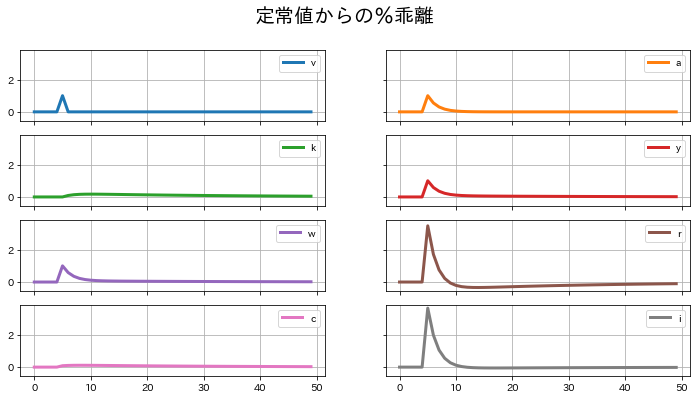

In [46]:
ax_ = rbc_basic_model.irs['v'].plot(subplots=True,  #1
                                    layout=(4,2),
                                    lw=3,
                                    figsize=(12,6),
                                    sharey=True,    #2
                                    grid=True)
ax_[0,0].get_figure().suptitle(                     #3
    '定常値からの％乖離',fontsize=20)                   #4
pass

```{admonition} コードの説明
:class: dropdown
* `#1`：以前も説明したが、`rbc_basic ....`はは６つの「軸」を返し、それを`ax_`に割り当てている。
* `#2`：引数`sharey=True`により全ての図の縦軸は同じ範囲を表示することになる。試しに`#`でコメント・アウトしてみよう。
* `#3`：`#1`で説明した６つの「軸」から`ax[0,0]`を取得し（他の「軸」でも良い、例えば、`ax[0,1]`）、そのメソッド`get_fiture()`を使い６つの「軸」からなる図全体のオブジェクトを取得している。更に、そのメソッド`suptitle()`を利用して図全体のタイトルを設定している。
    * `import matplotlib.pyplot as plt`としている場合は，`plt.suptitle('定常値からの％乖離',fontsize=20)`で同じ表示となる。
* `#4`：タイトルそして文字サイズを引数`fontsize`を使い指定している。
```

**＜シミュレーションの結果＞**

上でも説明したが，メソッド`solved()`は対数線形近似式を文字列として表示し，改行が２回（`\n\n`）入っている。これを利用してそれぞれの対数線形近似式を表示できるように準備する。

In [47]:
rbc0 = rbc_basic_model.solved().split('\n\n')

まず`y[t]`と`w[t]`を表示してみよう。

In [60]:
print(rbc0[3], '\n', rbc0[4], sep='')

  y[t] = a[t]+0.36·k[t]
  w[t] = a[t]+0.36·k[t]


* 右辺は同じになっている。これは$L$が一定と仮定しているためである。この仮定により，$Y_t$と$W_t$の式は異なるが，％乖離である`y`と`w`は同じ式に従って動くことになる。
* TFPショックは１対１の割合で`y`及び`w`を変化させる。
* TFPもしくは資本ストックの増加により労働の限界生産性及び実質賃金が上昇することを示している。インパクト後`y`も`w`も単調的に減少している。`k`の上昇効果よりも`a`の減少効果が上回るためである。`rho`の値が十分い大きい場合，`a`のpersistence強くなり`y`及び`w`の減少が弱まることになる。

次に，資本の実質レンタル料を見てみよう。

In [50]:
print(rbc0[5])

  r[t] = 3.475·a[t]-2.224·k[t]


* インパクトではTFPの増加は資本の限界生産性を上昇させる。
* インパクト後，資本蓄積が進むが，これにより資本の限界生産性及び実質利子率を減少させる。
* `a`の減少と資本の限界生産性の低減により，実質利子率の％乖離は一時的に`0`を下回っている。

次に消費を考えてみよう。

In [61]:
print(rbc0[6])

  c[t] = 0.0874·a[t]+0.6182·k[t]


`a`と`k`の係数の符号は両方とも正である。直感的には次のように理解できる。
* 生産関数と所得恒等式から
    * TFPと資本ストックの増加は産出量（所得）を増加させ，消費の増加に繋がる。
* 合理的消費者の最適化行動から
    * インパクト時に`c`は上方ジャンプしているが、その変化は0.1%を満たない程度である。その理由を理解するために，消費者は無限に生存し，未来を見据えた（forwarding-looking）選択を行っていることを思い出そう。消費者は賃金所得と貯蓄による利子所得を得るが，それが無限期間続くことになり，その現在価値の合計が**恒常所得**である。恒常所得仮説が示すように，現在の消費は恒常所得に比例して決定されることになる。この点を踏まえて，TFPのショックを考えよう。実質賃金$W_t$は上昇するが，その変化は一時的なものであるため恒常所得は大きく変わらないのである。つまり消費も大きくは変化しないことになる。また実質利子率及び実質レンタル料$R_t$も上昇するが，この効果により貯蓄がどのように変化するかは所得効果と代替効果に依存している。上のシミュレーションでは$\theta=1$を仮定しているため，両方の効果はお互いを相殺することになる。（$\theta\ne 1$の場合を試してみよう。）
    * 消費者は消費の変動を嫌うため（$\theta>0$はリスク回避的な効用関数）消費水準を均すインセンティブがある。これにより`c`は`y`のように大きく変化せず平滑化された推移となる。

投資を考えてみよう。

In [62]:
print(rbc0[-1])

  i[t] = 3.6466·a[t]-0.3889·k[t]


`a`の符号は正，`k`の符号は負である。次のメカニズムの反映と考えられる。
* 投資は貯蓄と常に等しいため，貯蓄の変化を考えれば良い。TFPと資本ストックの増加は産出量を増加させるが，消費の変化は大きくない。従って，貯蓄が大きく増えることになる。
* 一方で，経済が定常状態へ戻る過程で産出量は減少することになり，それに伴い投資も定常値に戻っていくことになる。

### コードを１つのセルにまとめる

ここでは上のコードを一つのセルにまとめて，全てを同時に実行し結果を表示してみよう。

定常値
a: 1.000
k: 12.536
y: 1.222
w: 2.371
r: 0.010
c: 0.909
i: 0.313

対数線形近似
a[t+1] = 0.551·a[t]+v[t+1]
k[t+1] = 0.0912·a[t]+0.9653·k[t]
  y[t] = a[t]+0.36·k[t]
  w[t] = a[t]+0.36·k[t]
  r[t] = 3.475·a[t]-2.224·k[t]
  c[t] = 0.0874·a[t]+0.6182·k[t]
  i[t] = 3.6466·a[t]-0.3889·k[t]


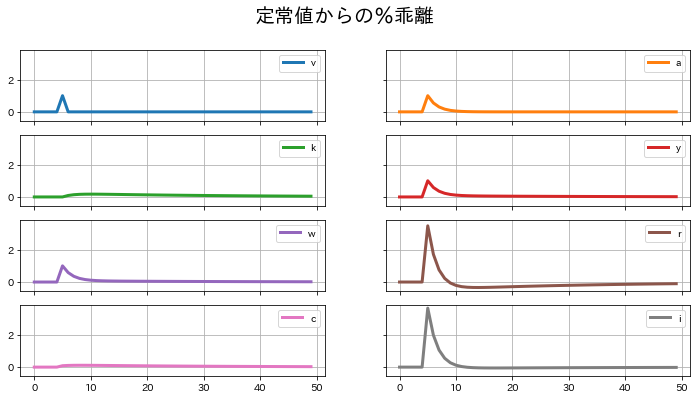

In [5]:
# パラメーターの値
parameters = pd.Series({'alpha':.36,
                        'beta':0.99,
                        'd':0.025,
                        'rho':0.551,
                        'sigma':0.0078**2,
                        'theta':1.0,
                        'L':0.33})

# 変数のリスト
var_names = ['a','k','y','w','r','c','i']
shock_names = ['v']

# 定常状態での均衡の関数
def equilibrium_equations(variables_forward, variables_current, parameters):
    fwd = variables_forward
    cur = variables_current
    p = parameters

    # 均衡条件
    euler = p['beta']*( 1+fwd['r'])/fwd['c']**p['theta'] - 1/cur['c']**p['theta']
    
    capital_change = cur['i'] + (1-p['d'])*cur['k'] - fwd['k']
    
    production_function = cur['a']*cur['k']**p['alpha']*p['L']**(1-p['alpha']) - cur['y']
    
    income_id = cur['c']+cur['i']-cur['y']
    
    wage = (1-p['alpha'])*cur['y']/p['L'] - cur['w']    
    
    interest_rate = p['alpha']*cur['y']/cur['k']-p['d']-cur['r']
    
    tfp = cur['a']**p['rho']-fwd['a']
    
    return np.array([euler,
                     capital_change,
                     production_function,
                     income_id,
                     wage,
                     interest_rate,
                     tfp])

# モデルの初期化
rbc_basic_model = ls.model(equations = equilibrium_equations,
                           n_states=2,
                           n_exo_states = 1,
                           var_names=var_names,
                           shock_names=shock_names,
                           parameters = parameters)

# 定常状態の計算
rbc_basic_model.compute_ss([1,5,2,1,1,1,1])
print('定常値')
for i in range(len(rbc_basic_model.ss)):
    print(f'{rbc_basic_model.ss.index[i]}: {rbc_basic_model.ss[i]:.3f}')
print('')

# 対数線形近似
rbc_basic_model.approximate_and_solve()
print('対数線形近似')
for s in rbc_basic_model.solved().split('\n\n')[1:]:
    print(s, sep='')

# インパルス反応の計算
rbc_basic_model.impulse(T=50, t0=5, percent=True)

# プロット
ax_ = rbc_basic_model.irs['v'].plot(subplots=True,
                                    layout=(4,2),
                                    lw=3,
                                    figsize=(12,6),
                                    sharey=True,
                                    grid=True)
ax_[0,0].get_figure().suptitle('定常値からの％乖離',fontsize=20)
pass

### 確率的シミュレーション

#### 図示

`.stoch_sim()`を使って確率的シミュレーションをおこなう。

In [68]:
rbc_basic_model.stoch_sim(seed=123, T=200,
                          cov_mat=[parameters['sigma']],
                          percent=True)

結果を図示しよう。

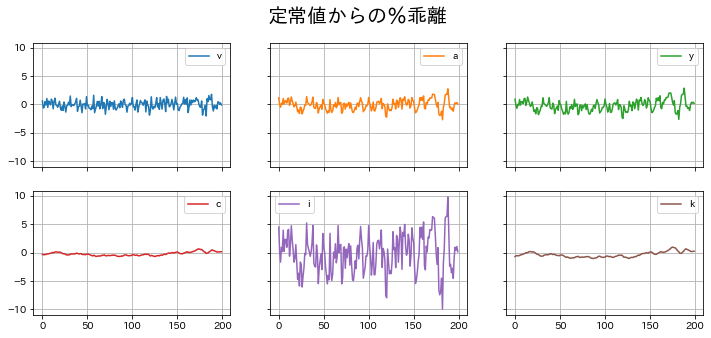

In [69]:
ax_ = rbc_basic_model.simulated[['v','a','y','c','i','k']].plot(subplots=True,
                                                                layout=(2,3),
                                                                figsize=(12,5),
                                                                sharey=True,
                                                                grid=True)
ax_[0,0].get_figure().suptitle('定常値からの％乖離',fontsize=20)
pass

#### 変動の大きさ

図から次のことがわかる。
* 投資の変動は他の変数の変動よりも大きい。
* 消費の変動は産出量の変動よりも小さい。これは消費者が変動を嫌う効用関数が仮定されているためである。

標準偏差を計算して数値で確かめてみよう。

In [22]:
var_list = ['y','c','i']

for v in var_list:
    var = rbc_basic_model.simulated[v].std() / rbc_basic_model.simulated['y'].std()
    print(f'{v}  {var:.2f}')

y  1.00
c  0.46
i  3.32


消費の変動は産出量の1/2以下であり、投資の変動は約3.3倍ある。日本のデータと比べてみよう。

```
gdp_cycle           1.00
consumption_cycle   0.73
investment_cycle    3.82
```

実際のデータと比べると、投資の変動は近いことがわかる。一方、消費の変動は小さ過ぎる。

#### 自己相関

次に、persistenceを確認するために自己相関係数を計算してみよう。

In [23]:
for v in var_list:
    autocorr = rbc_basic_model.simulated[v].autocorr()
    print(f'{v}  {autocorr:.2f}')

y  0.67
c  0.99
i  0.59


日本のデータと比べてみよう。
```
gdp_cycle           0.76
consumption_cycle   0.52
investment_cycle    0.84
```

シミュレーションでは`c`よりも`i`の自己相関係数が高いが，データではその逆となっている。

#### GDPとの相関度

GDPとの相関係数を計算してみる。

In [24]:
for v in var_list:
    corr = rbc_basic_model.simulated[['y', v]].corr().iloc[0,1]
    print(f'{v}  {corr:.2f}')

y  1.00
c  0.58
i  0.94


データと比べてみよう。
```
gdp_cycle           1.00
consumption_cycle   0.71
investment_cycle    0.82
```

シミュレーションの消費の相関係数はデータよりも低い、方向性としては良いのではないだろうか。

#### TFPと産出量

RBCモデルにおける景気循環の理由はTFPの変動である。実際、上の図の`a`と`y`を比べると同じように動いていることが分かる。それを確認するためにズームインしてみる。

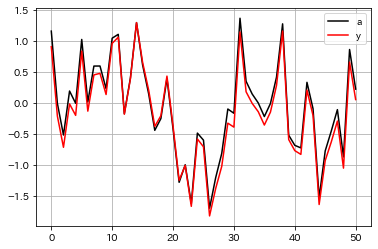

In [71]:
rbc_basic_model.simulated.loc[:50,['a','y']].plot(color=('k','red'), grid=True)
pass

`y`と`a`には「ずれ」があるり、資本ストックの変動を反映している。しかし，このプロットが示しているのは，GDPの変動は殆どTFPの変動により発生しているということだ。

この基本モデルでは，労働供給は一定と仮定しているため，労働供給の動きは全く存在しない。次のセクションでは，消費者の最適な労働供給を導入し，`a`の効果を増幅させるメカニズムとして機能することを明らかにする。

## 内生的労働供給の導入

### 消費者の最適化行動

基本モデルで仮定した効用関数は消費だけに依存しており、労働供給は一定と仮定した。ここではこの仮定を緩め、消費者は効用を最大化する労働供給を選択すると仮定する。

四半期を想定しているが、その期間の総時間の合計を1に標準化しよう。その内、消費者は$Z_t$（％）を余暇に使い、$L_t$（％）を労働に使うと仮定すると次式が制約式となる。

$$
1=Z_t+L_t
$$ (eq:15-constraint)

更に、消費者は消費と余暇の両方から効用を得るとして、$t$期の効用は次式で与えられると仮定しよう。

$$
u_t=
\begin{cases}
&\dfrac{C_t^{1-\theta}-1}{1-\theta}+m\log(Z_t)
    \quad\text{for }\theta>0\text{ and }\theta\neq 1\\
&\log(C_t)+m\log(Z_t)\quad\text{for }\theta=1
\end{cases}
,\qquad m>0
$$ (eq:15-utility-extended)

[](eq:15-utility)式と違う点は$m\log(Z_t)$が追加されているだけである。

毎期ごとに消費者は[](eq:15-utility-extended)式の$u_t$を得ることになるが，消費者の生涯効用を最大化するということは、毎期ごとに$u_t$を最大化するということでもある。このように考えると、[](eq:15-utility-extended)式を最大化する消費者の行動を考えれば良いわけで、これは典型的な２財の効用最大化問題と同じである（制約式は[](eq:15-constraint)だけではなく他にもあるが、ここでは重要ではない）。この場合の利点は[](eq:15-foc)式を直接使うことができるという点である。[](eq:15-foc)式を使うために，次のように考えよう。

消費者は働くことにより所得を得て消費することができる。言い換えると，消費$C_t$を１単位犠牲にすることにより，働く時間が減り，余暇$Z_t$を増やすことができるのである。このように考えると，余暇を増やす限界費用は消費の限界効用と等しいと考えることができる。この点を念頭に，消費と余暇の「交換」の限界費用と限界便益を[](eq:15-foc)式に落とし込むと次のようになる。

$$
\text{消費の限界効用}
=\text{余暇の限界効用}\times\frac{\text{消費財の価格}}{\text{余暇の価格}}
$$ (eq:15-foc-labour0)

消費者は，この式が満たされるように労働供給量を選択することになる。では，それぞれの項を考えてみよう。
* 消費の限界効用は，[](eq:15-utility-extended)から$\dfrac{1}{C_t^\theta}$となることがわかる。
* 余暇の限界効用は，[](eq:15-utility-extended)から$\dfrac{m}{Z_t}$となることがわかる。
* 消費財は$Y_t$と等しく、その価格は`1`に基準化されている。従って，消費財の価格は`1`である。
* 余暇の価格を考える。余暇が１単位増えると労働供給が１単位減少することになり、賃金$W_t$を失うことになる。即ち，余暇一単位の機会費用は$W_t$であり、$W_t$を払って余暇を買っているようなものである。

これらを使うと[](eq:15-foc-labour0)式は次式となる。

$$
\frac{1}{C_t^\theta}=\frac{m}{1-L_t}\cdot\frac{1}{W_t}
$$ (eq:15-foc-labour)

余暇の限界効用は制約式[](eq:15-constraint)を使って$L_t$で表している。[](eq:15-foc-labour)式が効用を最大化する労働供給を決める条件であり、全ての期（$t=0,1,2,3,\cdots$）で満たされる必要がある。

### 均衡条件

上の式から、次の条件を導出できる。

$$
\begin{align}
\frac{1}{C_t^\theta} & = \beta E_t \left\{\frac{1+R_{t+1}}{C_{t+1}^\theta}\right\}
&&\qquad (C_t\text{を決定する式})\\
\frac{1}{C_t} & = \dfrac{m}{(1-L_t)W_t}
&&\qquad (L_t\text{を決定する式})\\
K_{t+1} & = I_t + (1-d) K_t
&&\qquad (K_t\text{を決定する式})\\
Y_t & = A_t K_t^{\alpha}L^{1-\alpha}
&&\qquad (Y_t\text{を決定する式})\\
Y_t & = C_t + I_t
&&\qquad (I_t\text{を決定する式})\\
W_t &= (1-\alpha)\dfrac{Y_t}{L_t}
&&\qquad (W_t\text{を決定する式})\\
R_{t} & = \alpha\dfrac{Y_{t}}{K_{t}}-d
&&\qquad (R_t\text{を決定する式})\\
A_{t+1} & = A_t^{\rho}e^{v_{t+1}}
&&\qquad (A_t\text{を決定する式})
\end{align}
$$

* このモデルで決定される変数（内生変数）：
    * $C_t$, $L_t$，$K_t$, $Y_t$, $I_t$, $W_t$, $R_t$, $A_t$
* 所与として扱う変数（外生変数）
    * $v_{t}$, $\alpha$, $\beta$, $d$, $\rho$, $\theta$, $m$

### シミュレーション

#### ステップ１：パラメータの値

In [73]:
parameters = pd.Series({'alpha':0.36,
                        'beta':0.99,
                        'd':0.025,
                        'rho':0.551,
                        'sigma':0.0078**2,
                        'theta':1.0,
                        'm':1.73})
parameters

alpha    0.360000
beta     0.990000
d        0.025000
rho      0.551000
sigma    0.000061
theta    1.000000
m        1.730000
dtype: float64

* `alpha`：資本の所得シェア
* `beta`：消費者の主観的割引因子
    * 年率換算のために$\beta^4=\dfrac{1}{1+b}$とすると、年率の主観的割引率は$b\approx 0.041$となる。
* `d`：資本減耗率
    * 年率換算では$(1+0.0241)^4-1\approx 0.10$を仮定している。
* `rho`：日本のTFPを$AR(1)$として回帰分析した際の係数
* `sigma`：日本のTFPを$AR(1)$として回帰分析した際の残差の標準偏差
* `m`：定常状態で約1/3の時間が労働に費やされるように設定

#### ステップ２：変数リスト

内生変数のリストを作成する。状態変数を先に書き出す。

In [74]:
var_names = ['a','k','y','w','r','c','i','l']

ショック変数をリストとして書き出す。

In [75]:
shock_names = ['v']

#### ステップ３：定常状態での均衡条件の関数

均衡式の左辺を0にすると次のようになる。

$$
\begin{align}
0 & = \beta E_t \left\{\frac{1+R_{t+1}}{C_{t+1}^\theta}\right\}-\frac{1}{C_t^\theta}\\
0 & = \frac{m}{(1-L_t)W_t}-\dfrac{1}{C_t}\\
0 & = I_t + (1-d) K_t - K_{t+1}\\
0 & = A_t K_t^{\alpha}L_t^{1-\alpha} - Y_t\\
0 & = C_t + I_t - Y_t\\
0 & = \alpha\dfrac{Y_{t}}{K_{t}}-d-R_{t} \\
0 &= (1-\alpha)\dfrac{Y_t}{L_t} -W_t\\
0 & = A_t^{\rho}e^{\varepsilon_{t+1}}-A_{t+1}
\end{align}
$$

これを次の関数に書き込む。

In [76]:
def equilibrium_equations(variables_forward, variables_current, parameters):
    
    fwd = variables_forward
    
    cur = variables_current
    
    p = parameters

    # 均衡条件
    euler = p['beta']*( 1+fwd['r'])/fwd['c'] - 1/cur['c']
    
    labour_supply = p['m']/( (1-cur['l'])*cur['w'] ) - 1/cur['c']

    capital_change = cur['i'] + (1-p['d'])*cur['k'] - fwd['k']
    
    production_function = cur['a']*cur['k']**p['alpha']*cur['l']**(1-p['alpha']) - cur['y']   # (5)    
    
    income_id = cur['c']+cur['i']-cur['y']
    
    wage = (1-p['alpha'])*cur['y']/cur['l'] - cur['w']
    
    interest_rate = p['alpha']*cur['y']/cur['k']-p['d']-cur['r']
    
    tfp = cur['a']**p['rho']-fwd['a']
    
    # 返り値
    return np.array([euler,
                     labour_supply,
                     capital_change,
                     production_function,
                     income_id,
                     wage,
                     interest_rate,
                     tfp])

#### ステップ４：モデルの最終準備（初期化）

In [79]:
rbc_model = ls.model(equations = equilibrium_equations,
                     n_states=2,
                     n_exo_states=1,
                     var_names=var_names,
                     shock_names=shock_names,
                     parameters = parameters)

#### ステップ５：定常状態の計算

In [80]:
rbc_model.compute_ss([1, 10, 1, 2, 0.1, 1, 1, 0.5])

In [81]:
rbc_model.ss

a     1.000000
k    12.620864
y     1.230570
w     2.370598
r     0.010101
c     0.915048
i     0.315522
l     0.332222
dtype: float64

#### ステップ６：モデルを対数線形近似

In [82]:
rbc_model.approximate_and_solve()

### インパクト効果

ステップ６で計算した対数線形近似式を表示する。

In [83]:
print(rbc_model.solved())

Solution to the log-linear system:

a[t+1] = 0.551·a[t]+v[t+1]

k[t+1] = 0.1513·a[t]+0.9536·k[t]

  y[t] = 1.6488·a[t]+0.204·k[t]

  w[t] = 0.6351·a[t]+0.4477·k[t]

  r[t] = 5.7295·a[t]-2.766·k[t]

  c[t] = 0.1307·a[t]+0.569·k[t]

  i[t] = 6.0514·a[t]-0.8544·k[t]

  l[t] = 1.0137·a[t]-0.2437·k[t]


これらの式からインパクト効果が分かる。
* `t=0`期は定常状態とし，`t=1`期にショック項が`1％`上昇したとしよう。即ち，`e[1]=1%`。
* `a[1]=1%`にジャンプする。
* `k[1]=0`であり，状態変数の資本ストックは変化しない（`a[0]=k[0]=0`）。
* `y[1]>1%`であり，基本モデルと比べると大きくなっている。
* `w[1]<1%`であり，基本モデルと比べると変化は小さい。
* `r[1]>1%`であり，基本モデルと比べると更に大きくなっている。
* `c[1]`は基本モデルと比較して消費は大きく変化しない。
* `i[1]>1%`であり，基本モデルと比べると大きくなっている。
* `l[1]`は`a[1]`と同じ程度に変化している。

インパクト以降の変化は図で確かめることにする。

### インパルス反応

インパルス反応のデータを作成する。

In [92]:
rbc_model.impulse(T=50, t0=5, percent=True)

図示。

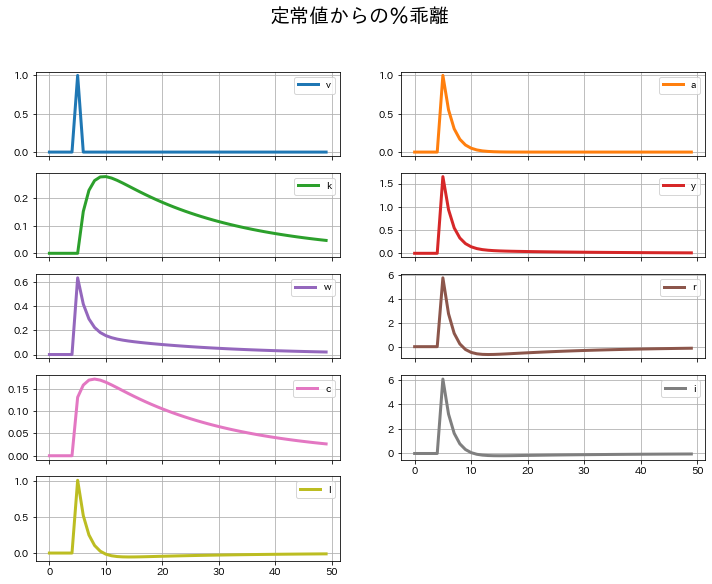

In [94]:
ax_ = rbc_model.irs['v'].plot(subplots=True,
                              layout=(5,2),
                              lw=3,
                              figsize=(12,9),
#                               sharey=True,
                              grid=True)
ax_[0,0].get_figure().suptitle('定常値からの％乖離',fontsize=20)
pass

**＜シミュレーションの結果＞**

In [91]:
print(rbc_model.solved().split('\n\n')[-1])

  l[t] = 1.0137·a[t]-0.2437·k[t]


労働供給が内生化された結果，「**労働供給の異時点間代替**」と呼ばれるメカニズムが追加されたことになる。２つのチャネルがある。
1. TFPが上昇すると労働の限界生産性及び実質賃金が上昇する。これは消費者にとっては余暇の「価格」が上昇したことと等しい。消費者は余暇を減らし労働供給を増やすことになる。また上の図が示しているように，賃金上昇が一時的であれば、その間に長い時間働く方が得だというインセンティブが発生し、インパクト時に労働供給の上方ジャンプとして現れる。
1. TFPが上昇すると資本の限界生産性及び実質利子率が上昇する。この変化は一時的なものであるため，収益率が高い間に長く働いて貯蓄を増やそうとするインセンティブが発生することになる。
    * 上の式で`k`の係数が負になっているのは，資本蓄積により資本の限界生産性が減少することにより，貯蓄の動機が弱まり，労働供給のインセンティブを弱めることを反映している。

労働供給の異時点間代替の結果、基本モデルと比べて次の変化が発生することになる。
* インパクト時の生産量のさらなる増加
* インパクト時の実質賃金の上昇が抑えられる。しかし賃金所得$W_tL_t$の％乖離（`w`+`l`）は正であり，賃金所得は増えることになる。これにより以下の変化が生じることになる。
    * 恒常所得の増加 $\Rightarrow$ 消費のさらなる増加
    * 貯蓄のさらなる増加
* 資本の限界生産性と実質利子率のさらなる増加 $\Rightarrow$ 貯蓄のさらなる増加 $\Rightarrow$ 投資のさらなる増加
    
（コメント）
* 労働供給`l`が10期目から負に転じている。この点を理解するために$L_t$を決定する均衡式を次のように書き換えてみよう。

    $$
    \frac{W_t}{C_t}=\frac{m}{1-L_t}
    $$
  
    $W_t$, $C_t$, $L_t$は全てインパクトで上昇している。これは$W_t$の上昇が$C_t$の増加を上回り、左辺が上昇していることを示している。しかし時間が経つ毎に$C_t$に比べて$W_t$の（絶対値の）変化は大きい。これにより上の式の左辺は減少し、更には、$L_t$は定常状態の値よりも低くなり、`l`は負に転じる期間が発生している。
* 実質利子率`r`も負に転じている期間があるが，次の２つの理由により資本の限界生産性が定常状態の値よりも低くなっているためである。
    1. 労働供給の減少（`l`が負になる）。
    1. 資本の蓄積

### コードを１つのセルにまとめる

ここでは上のコードを一つのセルにまとめて，全てを同時に実行し結果を表示してみよう。

定常値
a: 1.000
k: 12.621
y: 1.231
w: 2.371
r: 0.010
c: 0.915
i: 0.316
l: 0.332

対数線形近似
a[t+1] = 0.551·a[t]+v[t+1]
k[t+1] = 0.1513·a[t]+0.9536·k[t]
  y[t] = 1.6488·a[t]+0.204·k[t]
  w[t] = 0.6351·a[t]+0.4477·k[t]
  r[t] = 5.7295·a[t]-2.766·k[t]
  c[t] = 0.1307·a[t]+0.569·k[t]
  i[t] = 6.0514·a[t]-0.8544·k[t]
  l[t] = 1.0137·a[t]-0.2437·k[t]


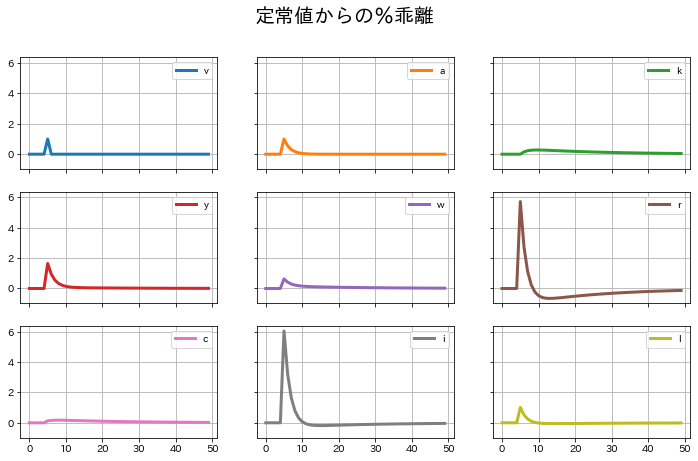

In [9]:
# パラメーターの値
parameters = pd.Series({'alpha':0.36,
                        'beta':0.99,
                        'd':0.025,
                        'rho':0.551,
                        'sigma':0.0078**2,
                        'theta':1.0,
                        'm':1.73})

# 変数のリスト
var_names = ['a','k','y','w','r','c','i','l']
shock_names = ['v']

# 定常状態での均衡の関数
def equilibrium_equations(variables_forward, variables_current, parameters):
    fwd = variables_forward
    cur = variables_current
    p = parameters

    # 均衡条件
    euler = p['beta']*( 1+fwd['r'])/fwd['c'] - 1/cur['c']
    
    labour_supply = p['m']/( (1-cur['l'])*cur['w'] ) - 1/cur['c']

    capital_change = cur['i'] + (1-p['d'])*cur['k'] - fwd['k']
    
    production_function = cur['a']*cur['k']**p['alpha']*cur['l']**(1-p['alpha']) - cur['y']   # (5)    
    
    income_id = cur['c']+cur['i']-cur['y']
    
    wage = (1-p['alpha'])*cur['y']/cur['l'] - cur['w']
    
    interest_rate = p['alpha']*cur['y']/cur['k']-p['d']-cur['r']
    
    tfp = cur['a']**p['rho']-fwd['a']
    
    # 返り値
    return np.array([euler,
                     labour_supply,
                     capital_change,
                     production_function,
                     income_id,
                     wage,
                     interest_rate,
                     tfp])

# モデルの初期化
rbc_model = ls.model(equations = equilibrium_equations,
                     n_states=2,
                     n_exo_states=1,
                     var_names=var_names,
                     shock_names=shock_names,
                     parameters = parameters)

# 定常状態の計算
rbc_model.compute_ss([1, 10, 1, 2, 0.1, 1, 1, 0.5])
print('定常値')
for i in range(len(rbc_model.ss)):
    print(f'{rbc_model.ss.index[i]}: {rbc_model.ss[i]:.3f}')
print('')

# 対数線形近似
rbc_model.approximate_and_solve()
print('対数線形近似')
for s in rbc_model.solved().split('\n\n')[1:]:
    print(s, sep='')

# インパルス反応の計算
rbc_model.impulse(T=50, t0=5, percent=True)

# プロット
ax_ = rbc_model.irs['v'].plot(subplots=True,
                              layout=(3,3),
                              lw=3,
                              figsize=(12,7),
                              sharey=True,
                              grid=True)
ax_[0,0].get_figure().suptitle('定常値からの％乖離',fontsize=20)
pass

### 確率的シミュレーション

In [37]:
cov = [[parameters['sigma'],0],
       [0,                  0]]

In [96]:
rbc_model.stoch_sim(seed=12345, T=200,
                    cov_mat=[parameters['sigma']],
                    percent=True)

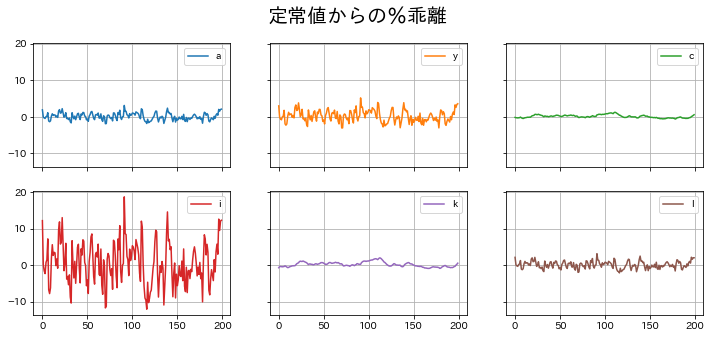

In [97]:
ax_ = rbc_model.simulated[['a','y','c','i','k','l']].plot(subplots=True,
                                                          layout=(2,3),
                                                          figsize=(12,5),
                                                          sharey=True,
                                                          grid=True)
ax_[0,0].get_figure().suptitle('定常値からの％乖離',fontsize=20)
pass

#### TFPと産出量

インパルス反応分析からも分かるがTFPと産出量の変動には乖離が生じている。それを確かめるために、最初の50のデータを図示する。

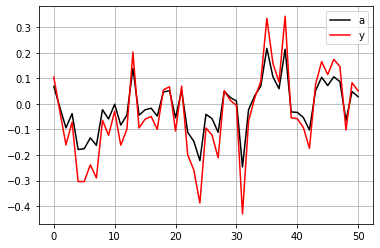

In [40]:
rbc_model.simulated.loc[:50,['a','y']].plot(color=('k','red'), grid=True)
pass

労働供給の異時点間代替が産出量の変動を増幅させている。

#### 変動の大きさ

In [98]:
var_list = ['y','c','i']

print('　内生的労働供給\t基本モデル')

for v in var_list:
    
    var = rbc_model.simulated[v].std() / rbc_model.simulated['y'].std()
    var_basic = rbc_basic_model.simulated[v].std() / rbc_basic_model.simulated['y'].std()
    
    print(f'{v}\t{var:.2f}\t  {var_basic:.2f}')

　内生的労働供給	基本モデル
y	1.00	  1.00
c	0.25	  0.33
i	3.62	  3.49


消費の変動は産出量の1/3以下であり、投資の変動は3.6倍ある。日本のデータと比べてみよう。

```
gdp_cycle           1.00
consumption_cycle   0.73
investment_cycle    3.82
```

内生的労働供給モデルの投資の変動はデータに近くなったが、消費の変動はデータとの差が大きくなっている。

#### 自己相関

In [99]:
print('　内生的労働供給\t基本モデル')

for v in var_list:
    autocorr = rbc_model.simulated[v].autocorr()
    autocorr_basic = rbc_basic_model.simulated[v].autocorr()
    print(f'{v}\t{autocorr:.2f}\t{autocorr_basic:.2f}')

　内生的労働供給	基本モデル
y	0.55	0.60
c	0.96	0.98
i	0.51	0.54


日本のデータと比べてみよう。
```
gdp_cycle           0.76
consumption_cycle   0.52
investment_cycle    0.84
```

内生的労働供給の導入で数値が改善している訳ではない。

#### GDPとの相関度

In [100]:
print('　内生的労働供給\t基本モデル')

for v in var_list:
    corr = rbc_model.simulated[['y', v]].corr().iloc[0,1]
    corr_basic = rbc_basic_model.simulated[['y', v]].corr().iloc[0,1]
    print(f'{v}\t{corr:.2f}\t{corr_basic:.2f}')

　内生的労働供給	基本モデル
y	1.00	1.00
c	0.47	0.53
i	0.98	0.97


データと比べてみよう。
```
gdp_cycle           1.00
consumption_cycle   0.71
investment_cycle    0.82
```

数値は殆ど変わらない。persistenceは`rho`の値に大きく依存するためである。

## RBCモデルの意義と限界

RBCモデルの意義はどこにあるのだろうか。RBCモデルは消費者と企業の最適化行動に基づいており、ルーカス批判を回避できる。またパラーメ
ータの設定方法や数値計算方法などでもその後の研究に大きな影響を及ぼしている。これらはマクロ経済学において大きな前進であり、マクロ・モデルの主流であるDSGE（Dynamic Stochastic General Equilibrium）モデルに引き継がれ、マクロ経済学の礎となったと言える。

しかしRBCモデルには様々な批判があり、ここでは特に次の２つについて言及する。
* 全ての市場は完全競争であり、市場の失敗は発生しない。即ち、毎期毎期パレト最適な均衡が達成されており、景気循環は市場の失敗の結果ではなく、TFPのショックに対する市場の最適な反応である。更には、景気循環を軽減する様な政府の介入は社会厚生を減少させることになる。このように現実経済を描写できるかは非常に疑問である。
* 価格は瞬時に調整されるため、古典派の二分法が成立している（名目変数と実質変数は分けて考えることが可能である）。更に、貨幣の中立性が成立しているため、中央銀行の金融政策は景気循環に何の影響も及ぼさない。RBCモデルの景気循環は純粋に実質変数の変動によって引き起こされており、それが実物的景気循環モデルと呼ばれる所以である。しかし、長期では古典派の二分法は成立しているかもしれないが、短期的にはそうではないというのが主流的な考えである。次章では、この点についてデータを使って考察することにする。